## K-Nearest Neighbors on Car Data to Predict Price

In [32]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Make a new dataframe containing only numerical columns

In [33]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [34]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Drop the rows where Price is null

In [35]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [36]:
# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


### Normalize numeric columns

In [37]:
#normalize columns
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [38]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


### K Nearest Neighbors Function

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df, features, target_col, k=5):
    if isinstance(features, str):
        features = [features]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    # Randomize row order
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Split rand_df in half
    idx = len(rand_df)//2
    train = rand_df.iloc[:idx]
    test = rand_df.iloc[idx:]
    
    # train the model
    results = knn.fit(train[features], train[target_col])
    
    # get predictions
    predictions = knn.predict(test[features])
    
    # calculate rmse
    mse = mean_squared_error(test[target_col], predictions)
    rmse = mse ** (1/2)
    
    return rmse

### Use Nearest Neighbors (where k=5) using only one feature from our dataset

In [74]:
rmse_results = {}
features = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for feature in features:
    rmse_val = knn_train_test(numeric_cars, feature, 'price')
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

### Use Nearest Neighbors using only one feature from our dataset and use k \in \{ 1,3,5,7,9 \}

In [75]:
from collections import defaultdict

features = numeric_cars.columns.drop('price')

rmse_results = defaultdict(list)
for col in features:
    for k in range(1,10,2):
        rmse_val = knn_train_test(numeric_cars, col, 'price',  k)
        rmse_results[col].append(rmse_val)
        
rmse_results = pd.DataFrame(rmse_results, index=range(1,10,2))
rmse_results

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
1,7846.750605,4493.734069,4628.455501,4559.257298,8904.046456,5264.290231,8602.588485,9116.495955,8087.205347,4170.054848,9511.480068,5901.143574,6025.594967
3,7500.569812,5120.161506,5129.835821,4606.413692,8277.609643,5022.318012,6984.239489,7338.684670,7375.063686,4020.849263,8537.550900,4646.746409,4617.305020
5,7330.197653,5461.553998,5427.200961,4704.482590,8144.441043,4401.118255,6780.627785,8006.529545,6610.812153,4037.037713,7697.459696,4766.422505,4630.026799
7,7756.421586,5448.107051,5313.427721,4571.485046,7679.598124,4330.608104,6878.097966,7803.937797,6732.801283,4353.811860,7510.294160,5232.523034,4796.061440
9,7688.096097,5738.405685,5383.054515,4652.914172,7811.036063,4632.044474,6866.808502,7735.554366,7024.485525,4515.135617,7340.041341,5465.209493,5278.358057


### Plotting the RMSEs for when using each feature over the different k values

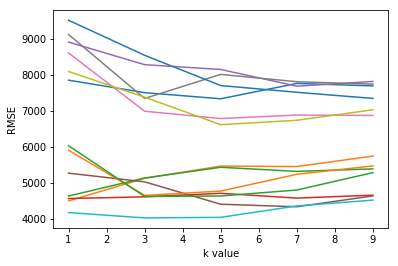

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

rmse_results.reset_index().plot(x='index',y=rmse_results.columns)
plt.xlabel('k value')
plt.ylabel('RMSE')
legend = plt.legend()
legend.remove()

### Find the n lowest RMSEs (when k=5)

In [77]:
def n_smallest(n):
    return rmse_results.loc[5].sort_values().index[:n]

In [96]:
k_rmse_results = []

for n in range(2,7):
    features = n_smallest(n)
    k_rmse_results.append(knn_train_test(numeric_cars, features, 'price'))
    
rmses = pd.DataFrame(k_rmse_results, index=range(2,7), columns=['RMSEs']).sort_values('RMSEs')
rmses

,RMSEs
2,3257.849049
5,3341.602454
4,3358.691580
3,3365.911000
6,3628.261188


### Take the 3 lowest RMSEs and find the k that yields the lowest RMSE.

In [120]:
k_rmse_results = defaultdict(list)
for n in rmses.index[:3]:
    features = n_smallest(n)
    for k in range(1,25):
        k_rmse_results[n].append(knn_train_test(numeric_cars, features, 'price', k=k))
k_rmse_results = pd.DataFrame(k_rmse_results, index=range(1,25))
k_rmse_results.columns = [f'{n} best features' for n in k_rmse_results.columns]
k_rmse_results.head()

,2 best features,5 best features,4 best features
1,2790.107143,2530.055408,2600.746384
2,2700.747235,2897.175797,2725.432507
3,3003.748806,3183.459743,3108.858031
4,3106.605626,3168.023042,3217.313521
5,3257.849049,3341.602454,3358.691580


Text(0, 0.5, 'RMSEs')

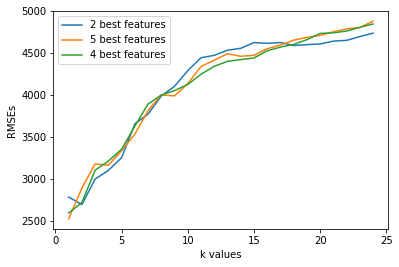

In [121]:
k_rmse_results.reset_index().plot(x='index',y=k_rmse_results.columns)
plt.xlabel('k values')
plt.ylabel('RMSEs')